# Building a recommender system with Python using NumPy and SciPy
# ทำความรู้จัก และสร้าง recommender system ด้วย Python โดยใช้ NumPy และ SciPy

**Credits**: The contents of this article were made possible using information from several sources. Some important ones are listed below.

**คำขอบคุณ**: เนื้อหาเรียบเรียงจากการประกอบความเข้าใจและตัวอย่างจากหลายแหล่งที่มา ที่สำคัญ คือ
* [A class note from Stanford's machine learning course presented by Professor Andrew Ng: Recommender systems - introduction](http://www.holehouse.org/mlclass/16_Recommender_Systems.html)
* [A blog post: Movie Recommendations? How Does Netflix Do It? A 9 Step Coding (Python) & Intuitive Guide Into Collaborative Filtering](https://nikhilwins.wordpress.com/2015/09/18/movie-recommendations-how-does-netflix-do-it-a-9-step-coding-intuitive-guide-into-collaborative-filtering/)
* [A blog post: Quick Guide to Build a Recommendation Engine in Python](https://www.analyticsvidhya.com/blog/2016/06/quick-guide-build-recommendation-engine-python/)
* [Movie ratings dataset from MovieLens]( http://files.grouplens.org/datasets/movielens/ml-100k/) 

In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


## บทนำ

ตั้งแต่สังคมมนุษย์เริ่มเรียนรู้การแลกเปลี่ยนซื้อขายสิ่งต่างๆ สิ่งหนึ่งที่ถูกสร้างขึ้นมาในเวลาเดียวกันก็คือการแนะนำสินค้า โดยจุดประสงค์ก็เพื่อให้ผู้เสนอสินค้า(หรือบริการ)สามารถส่งออกสินค้าที่ตนนำเสนอได้ดียิ่งขึ้น และให้ผู้ซื้อได้สินค้าที่เหมาะกับตนเอง ตัวอย่างการแนะนำสินค้าในชีวิตประจำวันก็เช่น การแนะนำร้านอาหารที่ตนชอบให้เพื่อนลองไปทาน การแนะนำในระดับนี้ไม่ซับซ้อน แต่อาจไม่แม่นยำ เช่น ผู้ได้รับการแนะนำอาจจะไม่ชอบร้านอาหารนั้นเมื่อได้ไปลอง เนื่องจากผู้แนะนำไม่ทราบข้อมูลความชอบหลายๆ อย่าง ของผู้ได้รับการแนะนำ

ในยุคของ internet ที่ทั้งร้านค้าและผู้รับบริการมีความเชื่อมต่อกันมากขึ้น การแนะนำสินค้านั้นได้มีการพัฒนาให้มีความแม่นยำ (accurate) และเฉพาะบุคคล (personalized) มากขึ้น โดยผู้ใช้งาน internet นั้น ได้เข้าไปมีความเกี่ยวพันกับระบบการแนะนำสินค้า ไม่ว่าจะทั้งทางตรงหรือทางอ้อม ตัวอย่างการแนะนำสินค้าที่คาดว่าผู้ใช้งาน internet เคยเห็นกันก็ เช่น การแนะนำวิดีโอบน YouTube หรือ Netflix, การแนะนำสินค้าบน Amazon หรือ Lazada, หรือการแนะนำร้านอาหารบน Yelp หรือ Wongnai

สิ่งที่ร้านค้าเหล่านี้ทำนั้นก้าวข้ามการแนะนำสินค้าจากปากต่อปาก ดังเช่นตัวอย่างการแนะนำร้านอาหารจากเพื่อนสู่เพื่อนที่กล่าวข้างต้น โดยในยุคของ internet นี้ ข้อมูลจำนวนมากทั้งของร้านค้า(หรือสินค้า) และผู้ซื้อสินค้าได้ถูกบันทึกไว้บนฐานข้อมูล ซึ่งข้อมูลเหล่านี้สามารถนำมาใช้ทำระบบการแนะนำสินค้า (*recommender systems*) ที่มีความแม่นยำและเฉพาะบุคคลมากขึ้น โดยมีจุดหมายเพื่อตอบสนองจุดประสงค์ดั้งเดิมของการแนะนำสินค้า ซึ่งก็คือ เพื่อให้ผู้เสนอสินค้าสามารถส่งออกสินค้าของตนได้ดียิ่งขึ้น และให้ผู้ซื้อได้สินค้าที่เหมาะกับตนเอง กล่าวคือ **เพื่อประโยชน์สูงสุดของทั้งสองฝ่าย**

ในบทความนี้ ผู้เขียนนำเสนอการสร้าง **a recommender system** ที่อิงหลักการ *collaborative filtering* โดยใช้ Python และ libraries พื้นฐานสองตัวคือ NumPy และ SciPy สร้างระบบการคำนวน (ใช้ Pandas, Matplotlib, Seaborn ช่วยในการจัดการและวาดแผนผังแสดงผล) และในส่วนเนื้อหาที่เขียนมีการใช้ความเข้าใจขั้นพื้นฐานทาง linear algebra (matrix manipulation, gradient function) และ machine learning (cost function, optimization, gradient descent)


## Recommendation with collaborative filtering?

หากจะแปลความเป็นภาษาไทย collaborative filtering น่าจะเรียกสั้นๆ ว่า การคัดกรองร่วม ซึ่งก็มากจากการที่ระบบคัดกรองแบบนี้ ใช้ข้อมูลที่ทราบค่าของสินค้าหลายๆ ตัว และผู้ใช้หลายๆ ท่าน เพื่อคาดการณ์ว่าผู้ใช้ที่ไม่เคยใช้สินค้านั้นจะชอบสินค้านั้นหรือไม่

เราจะใช้ตัวอย่างการแนะนำภาพยนตร์(สินค้า) ซึ่งทำโดยการคาดการณ์การให้ **movie ratings** (คะแนนภาพยนตร์) ของผู้ไม่เคยชมภาพยนตร์เรื่องใดเรื่องหนึ่ง(หรือหลายเรื่อง) โดยคำนวนจากคะแนนภาพยนตร์ที่ผู้ชมท่านนั้นเคยให้กับภาพยนตร์เรื่องอื่น และคะแนนภาพยนตร์ที่ผู้ชมท่านอื่นๆ เคยให้กับภาพยนตร์เรื่องนั้น 

การใช้ collaborative filtering ในกรณีนี้ สามารถทำความเข้าใจได้คร่าวๆ เช่นว่า หากเรามีตารางรายชื่อภาพยนตร์และคะแนนที่ภาพยนตร์นั้นได้รับจากการโหวตโดยผู้ชมหลายคน ดังตัวอย่างนี้ (จาก [คำขอบคุณที่ 1](http://www.holehouse.org/mlclass/16_Recommender_Systems.html))

![Example movie rating matrix](http://www.holehouse.org/mlclass/16_Recommender_Systems_files/Image.png)

จะเห็นว่าผู้ชมแต่ละคนไม่ได้ให้คะแนนภาพยนตร์ทุกเรื่อง(ระบุจากสัญลักษณ์ **?**) แต่หากมีสองคนที่มีการให้คะแนนภาพยนตร์คล้ายๆ กัน เช่น Alice และ Bob ชอบภาพยนตร์เรื่อง Love at last และ Romance forever นอกจากนั้น Bob ยังชอบภาพยนตร์เรื่อง Cute puppies of love ด้วย แต่ Alice ยังไม่เคยให้คะแนนภาพยนตร์เรื่องดังกล่าว ก็มีความน่าจะเป็นที่ Alice จะชอบภาพยนตร์เรื่องนั้นด้วย นี่เป็นตัวอย่างการใช้ความร่วมมือของข้อมูลที่ Alice และ Bob มีร่วมกัน


## Ratings as a function of movie features and user preferences <br> (คะแนนภาพยนตร์เป็นผลลัพธ์จากเนื้อหาของภาพยนตร์และรสนิยมของผู้ให้คะแนน)
เราสามารถคาดการณ์ได้ว่าคะแนนที่ผู้ชมจะให้กับภาพยนตร์เรื่องใดเรื่องหนึ่งนั้นขึ้นกับสองปัจจัยหลัก คือ movie features (เนื้อหาหรือประเภทของภาพยนตร์ เช่น โรแมนติก, ตลก, ผจญภัย, …) และ user preferences (รสนิยมของผู้ให้คะแนน เช่น ชอบภาพยนตร์ผจญภัย, ไม่ชอบภาพยนตร์ประวัติศาสตร์, …) โดยการคำนวนคะแนนภาพยนตร์ \\(i\\) จากผู้ให้คะแนน \\(j\\) สามารถเขียนเป็นสมการได้ดังนี้

$$
p_{ij} = {\textbf{x}^{(i)}}^{T} \times \boldsymbol{\theta}^{(j)}
=\begin{bmatrix} x_{1}^{(i)} \\ x_{2}^{(i)} \\ \vdots \\ x_{k}^{(i)} \end{bmatrix}^{T} 
\times 
\begin{bmatrix}\theta_{1}^{(j)}\\ \theta_{2}^{(j)}\\ \vdots \\ \theta_{k}^{(j)} \end{bmatrix}
= x_{1}^{(i)}\theta_{1}^{(j)} + x_{2}^{(i)}\theta_{2}^{(j)} + \cdots + x_{k}^{(i)}\theta_{k}^{(j)}
$$

ในที่นี้ \\(p_{ij}\\) เป็นค่า predicted rating (คะแนนคาดการณ์) ที่ ภาพยนตร์ \\(i\\) จะได้รับจากผู้ให้คะแนน \\(j\\), <br>
\\({\textbf{x}^{(i)}}\\) เป็น vector ที่บอก movie features โดยในที่นี้เราสมมติว่าแยกไว้ \\(k\\) ประเภท เช่น ถ้า \\(x_{k=3}^{(i)}\\) เป็นตัวบอกความโรแมนติก ภาพยนตร์โรแมนติกก็จะมีค่านี้สูง, <br>
\\(\boldsymbol{\theta}^{(j)}\\) เป็น vector ที่บอก user preferences เช่น \\(\theta_{k=5}^{(i)}\\) เป็นตัวแสดงความชอบภาพยนตร์ผจญภัย ผู้ที่ชอบภาพยนตร์ผจญภัยก็จะมีค่านี้สูง

แต่ในกรณีตัวอย่างของเรานั้น เราทราบเพียงค่าคะแนนที่ภาพยนตร์ได้รับจากผู้ให้คะแนนหลายๆ ท่าน (ใช้ตัวแปร \\(r_{ij}\\), ในที่นี้ \\(p_{ij}\\) เป็นค่าคะแนนคาดการณ์  ส่วน \\(r_{ij}\\) เป็นคะแนนจริง) แต่ไม่ทราบทั้งค่าเนื้อหา \\({\textbf{x}^{(i)}}\\) และค่ารสนิยม \\(\boldsymbol{\theta}^{(j)}\\) (หากทราบจะสามารถใช้ระบบการคัดกรองแบบอื่นได้ เช่น *content based filtering* – ลองไปหาอ่านได้ครับ) สิ่งที่เราต้องทำคือการประมาณค่าทั้งสองที่ว่า โดยใช้ค่าคะแนนของภาพยนตร์ที่เรามี กล่าวคือ เราต้องประมาณค่า vector \\({\textbf{x}^{(i)}}\\) และ \\(\boldsymbol{\theta}^{(j)}\\) โดยใช้ค่า \\(r_{ij}\\)

## ทำความรู้จักชุดข้อมูลตัวอย่าง

Dataset (ชุดข้อมูล) ที่เราจะใช้นั้น เป็นชุดข้อมูลชื่อ [MovieLens]( http://files.grouplens.org/datasets/movielens/ml-100k/) ที่เก็บและเรียบเรียงโดย [the GroupLens Research Project at the University of Minnesota]( https://grouplens.org/) ซึ่งมีคำอธิบายประกอบเบื้องต้น ดังนี้
 
```
This data set consists of:
* 100,000 ratings (1-5) from 943 users on 1682 movies. 
* Each user has rated at least 20 movies.
* Simple demographic info for the users (age, gender, occupation, zip)
```

โดยเราจะใช้ชุดข้อมูลย่อย **u.data** ในการสาธิตการสร้างระบบแนะนำภาพยนตร์

หลังจาก download ชุดข้อมูลลงเครื่องแล้ว เราก็ลองเรียกข้อมูล10 รายการแรก ขึ้นมาดูว่าหน้าตาเป็นอย่างไร โดยจะเห็นได้ว่าข้อมูลนั้นถูกจัดเรียงเป็นตาราง ซึ่งแต่ละแถวบอกว่าผู้ให้คนแนนท่านไหน (ระบุจาก user_id) ให้คะแนนภาพยนตร์เรื่องใด (ระบุจาก movie_id) เป็นคะแนนเท่าไหร่ (จาก 1 ถึง 5)

In [2]:
# create DataFrame objects to store three sets of data

import pandas as pd

r_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
ratings = pd.read_csv('ml-100k/u.data', sep='\t', names=r_cols)

print('matrix size:', ratings.shape)
ratings.head(10)

matrix size: (100000, 4)


,user_id,movie_id,rating,unix_timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
5,298,474,4,884182806
6,115,265,2,881171488
7,253,465,5,891628467
8,305,451,3,886324817
9,6,86,3,883603013


นอกจากชุดข้อมูลย่อย u.data แล้ว ยังมี u.user และ u.item ที่บอกรายละเอียดของผู้ให้คะแนน และ ภาพยนตร์ ซึ่งทั้งสองส่วนนี้สามารถนำมาใช้ประกอบเพื่อให้ระบบที่เราสร้างมีประสิทธิภาพมากขึ้น แต่ในที่นี้เราจะไม่นำมาใช้ ลองเรียกขึ้นมาดูได้ครับว่าชุดข้อมูลดังกล่างหน้าตาเป็นอย่างไร

In [3]:
u_cols = ['user_id', 'age', 'sex', 'occupation', 'zip_code']
users = pd.read_csv('ml-100k/u.user', sep='|', names=u_cols)

print('matrix size:', users.shape)
users.head(10)

matrix size: (943, 5)


,user_id,age,sex,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
5,6,42,M,executive,98101
6,7,57,M,administrator,91344
7,8,36,M,administrator,05201
8,9,29,M,student,01002
9,10,53,M,lawyer,90703


In [4]:
i_cols = ['movie_id', 'movie_title', 'release_date', 'video_release_date', 
          'IMBb_url', 'unknown', 'action', 'adventure', 'animation', 'children\'s',
          'comedy', 'crime', 'documentary', 'drama', 'fantasy', 'film-noir', 
          'horror', 'musical', 'mystery', 'romance', 'sci-fi', 'thriller', 
          'war', 'western']
items = pd.read_csv('ml-100k/u.item', sep='|', names=i_cols, encoding='latin-1')

print('matrix size:', items.shape)
items.head(10)

matrix size: (1682, 24)


,movie_id,movie_title,release_date,video_release_date,IMBb_url,unknown,action,adventure,animation,children's,...,fantasy,film-noir,horror,musical,mystery,romance,sci-fi,thriller,war,western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,6,Shanghai Triad (Yao a yao yao dao waipo qiao) ...,01-Jan-1995,NaN,http://us.imdb.com/Title?Yao+a+yao+yao+dao+wai...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,Twelve Monkeys (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Twelve%20Monk...,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7,8,Babe (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Babe%20(1995),0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8,9,Dead Man Walking (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Dead%20Man%20...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,10,Richard III (1995),22-Jan-1996,NaN,http://us.imdb.com/M/title-exact?Richard%20III...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


## จัดเรียงข้อมูลลง matrix

เนื่องจากข้อมูลที่อยู่ในการเรียงข้อมูลแบบตารางรายการยาวลงมา 100,000 รายการนั้น ไม่สะดวกต่อการวิเคราะห์ต่อ เราจึงต้องนำข้อมูลมาจัดลง matrix หลังจากนั้นก็มาดูว่าข้อมูลที่เรามีหน้าตาเป็นอย่างไร ซึ่งในที่นี้เราทำโดยการวาดแผนผังแบบ heatmap

In [5]:
# create a movie-user rating_matrix in DataFrame

import numpy as np 
num_users = ratings.user_id.unique().shape[0]
num_movies = ratings.movie_id.unique().shape[0]

# movie_id --> index, user_id --> column
rating_matrix = pd.DataFrame(np.nan, index=range(1,num_movies+1), columns=range(1,num_users+1))

In [6]:
# assign ratings to appropriate elements of the matrix

for i in range(ratings.shape[0]):
    rating_matrix.iloc[ratings.movie_id[i]-1, ratings.user_id[i]-1] = ratings.rating[i]

rating_matrix.sample(10)

,1,2,3,4,5,6,7,8,9,10,...,934,935,936,937,938,939,940,941,942,943
202,5.0,NaN,NaN,NaN,NaN,3.0,3.0,NaN,NaN,NaN,...,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
1328,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
280,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN
35,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
288,NaN,3.0,2.0,4.0,NaN,NaN,4.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN
1432,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1028,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,5.0,5.0,NaN,NaN,4.0,2.0
764,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1404,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1283,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN


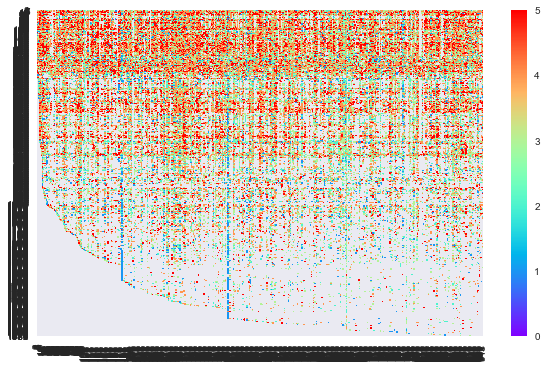

In [7]:
# plot rating_matrix

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1,1,figsize=(10,6))
ax = sns.heatmap(rating_matrix, 0,5, cmap='rainbow')

plt.show()

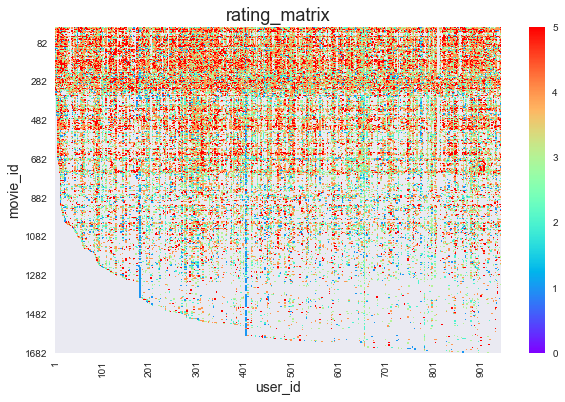

In [8]:
# ticks are too dense so let's make them more sparse

fig2, ax2 = plt.subplots(1,1,figsize=(10,6))
ax2 = sns.heatmap(rating_matrix, 0,5, cmap='rainbow')

ax2.set_title('rating_matrix', fontsize=18)

ax2.set_xlabel('user_id', fontsize=14)
# need to set ticklabels first then ticks(location) -- otherwise it messes up the labels
ax2.set_xticklabels(ax2.get_xticklabels()[::100])
ax2.set_xticks(ax2.get_xticks()[::100])

ax2.set_ylabel('movie_id', fontsize=14)
# locations of yticks are from bottom to top --> label runs from 1682 to 1
ax2.set_yticklabels(ax2.get_yticklabels()[::200])
ax2.set_yticks(ax2.get_yticks()[::200])

plt.show()

จากผังก็จะเห็นว่าภาพยนตร์ที่มี movie_id ต้นๆ นั้นมีผู้ให้คะแนนหลายคนกว่า movie_id ท้ายๆ และ(จากสายตา)ผู้ให้คะแนนภาพยนตร์ส่วนมากจะให้คะแนนดี (จำนวนจุดสีโทนแดงมีมากกว่าโทนฟ้า) โดยคู่ ภาพยนตร์-ผู้ให้คะแนน ที่ไม่มีคะแนนบันทึกนั้นแสดงด้วยส่วนสีเทา

อันนี้ลองดูเล่นๆ กันว่าผู้ให้คะแนนท่านไหนให้คะแนนภาพยนตร์หลายเรื่องที่สุด และให้คะแนนไปกี่เรื่อง

In [9]:
print('User ID: %d rated %d movies, the higest number of movies rated by one user.' % 
      (rating_matrix.notnull().sum(axis=0).argmax(), rating_matrix.notnull().sum(axis=0).max()))

User ID: 405 rated 737 movies, the higest number of movies rated by one user.


เนื่องจากจำนวนข้อมูลมีมาก ในขั้นต่อไปผู้เขียนจึงเลือกสุ่มคะแนนภาพยนตร์ 100 เรื่อง จากผู้ให้คะแนน 30 ท่าน มาทำการคำนวน โดยการลดขนาดข้อมูลนี้ช่วยให้การแสดงแผนผังประกอบการอธิบายทำได้เห็นภาพง่ายขึ้นและลดเวลาการประมวลผล แต่หากเราต้องการสร้างระบบแนะนำสินค้าจริงก็แน่นอนว่าควรใช้ข้อมูลทั้งหมดที่มี 

ผู้เขียนเลือกสุ่มจาก movie_id=[1, 150] และ user_id=[1, 50] เพราะช่วงดังกล่าวมีค่าคะแนนจริงอยู่หนาแน่น

กลุ่มภาพยนตร์และผู้ให้คะแนนที่เราสุ่มมามีแผนผังคะแนน ดังนี้

In [10]:
# It is too much of computation to make a model using all data
# just randomly pick some for testing

rand_user_size = 30
rand_movie_size = 100

# rand_user_id = np.random.choice(num_users, rand_user_size)
# rand_movie_id = np.random.choice(num_movies, rand_movie_size)
rand_user_id = np.random.choice(50, rand_user_size)
rand_movie_id = np.random.choice(150, rand_movie_size)

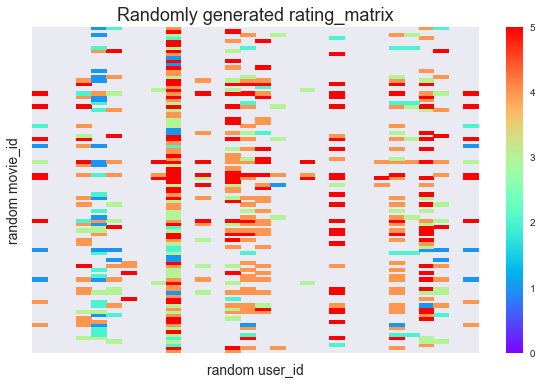

In [11]:
# new randomly generated rating_matrix
rand_rating_matrix = pd.DataFrame(rating_matrix,rand_movie_id,rand_user_id)

fig, ax = plt.subplots(1,1,figsize=(10,6))
ax = sns.heatmap(rand_rating_matrix, 0,5, cmap='rainbow')

ax.set_title('Randomly generated rating_matrix', fontsize=18)
ax.set_xlabel('random user_id', fontsize=14)
ax.set_ylabel('random movie_id', fontsize=14)
ax.set_xticklabels([])
ax.set_yticklabels([])

plt.show()

## Predictions and cost function (ค่าคาดการณ์และราคาความคลาดเคลื่อน)

จากสมการก่อนหน้าที่เรามีว่า \\(p_{ij} = {\textbf{x}^{(i)}}^{T} \times \boldsymbol{\theta}^{(j)}\\) เราสามารถเขียน rating matrix (ตารางคะแนนภาพยนตร์) ที่บันทึกค่าคะแนนภาพยนตร์ของหนัง \\(m\\) เรื่อง จากผู้ให้คะแนน \\(n\\) บุคคล ได้ดังนี้

$$
\textbf{P}=\textbf{X} \times \boldsymbol{\Theta}^{T}
$$

โดย 

\\(
\textbf{P} =
\begin{bmatrix} p_{11} & p_{12} & \cdots & p_{1n} \\ 
p_{21} & \ddots & \ddots & \vdots \\ 
\vdots & \ddots & \ddots & \vdots \\
p_{m1} & \cdots & \cdots & p_{mn} \end{bmatrix}, 
\textbf{X} =
\begin{bmatrix} x_{1}^{(1)} & x_{2}^{(1)} & \cdots & x_{k}^{(1)} \\ 
x_{1}^{(2)} & \ddots & \ddots & \vdots \\ 
\vdots & \ddots & \ddots & \vdots \\
x_{1}^{(m)} & \cdots & \cdots & x_{k}^{(m)} \end{bmatrix}, 
\boldsymbol{\Theta} =
\begin{bmatrix} \theta_{1}^{(1)} & \theta_{2}^{(1)} & \cdots & \theta_{k}^{(1)} \\ 
\theta_{1}^{(2)} & \ddots & \ddots & \vdots \\ 
\vdots & \ddots & \ddots & \vdots \\
\theta_{1}^{(n)} & \cdots & \cdots & \theta_{k}^{(n)} \end{bmatrix}^T
\\)

เนื่องจากเราไม่ทราบค่า \\(\textbf{X}\\) และ \\(\boldsymbol{\Theta}\\) แต่เราต้องการทราบค่าทั้งสองนี้(และค่าย่อยใน matrix ทั้งหมด, หรือเรียกว่า matrix elements) เราจึงต้องเริ่มโดยการสั่งให้โปรแกรมสร้างค่าแบบสุ่มขึ้นมา จากนั้นจึงจะดูว่า predictions (ค่าคาดการณ์) ที่สุ่มขึ้นมานั้นห่างจากข้อมูลจริงเท่าไหร่ โดยดูค่า cost function (ราคาความคลาดเคลื่อน) และจึงคำนวน feedback เพื่อนำมาปรับทั้งค่า และ ให้ได้ค่าคาดการณ์ที่ใกล้เคียงค่าคะแนนภาพยนตร์ที่เป็นข้อมูลจริงมากขึ้น

ก่อนจะไปดูเรื่อง cost function เรามาลองเปรียบเทียบแผนผังของค่า \\(\textbf{P}\\) (predicted rating matrix) ที่คำนวนจากค่า \\(\textbf{X}\\) และ \\(\boldsymbol{\Theta}\\) ที่สุ่มขึ้นมา (initial predictions of ratings by randomization) กับค่าคะแนนจริง \\(\textbf{R}\\) (actual rating matrix) โดย 

\\(\textbf{R}=\begin{bmatrix} r_{11} & r_{12} & \cdots & r_{1n} \\ r_{21} & \ddots & \ddots & \vdots \\ \vdots & \ddots & \ddots & \vdots \\ r_{m1} & \cdots & \cdots & r_{mn} \end{bmatrix}\\)

**ปล.** ค่า \\(\textbf{R}\\) ที่เราจะใช้ในส่วนต่อไปนี้นั้น เป็นค่าคะแนนภาพยนตร์ที่แต่ละเรื่องถูกทำ mean normalization (การปรับค่าคะแนนเฉลี่ยให้เป็น 0) โดยการปรับค่าเช่นนี้ทำให้เราสามารถคาดการณ์คะแนนภาพยนตร์จากผู้ที่ไม่เคยให้คะแนนภาพยนตร์เลยสักเรื่องด้วยค่าคะแนนเฉลี่ยของภาพยนตร์แต่ละเรื่อง มิเช่นนั้น ผู้ที่ไม่เคยให้คะแนนภาพยนตร์เลยจะได้รับการคาดการณ์ว่าจะให้คะแนนแนะนำภาพยนตร์เป็น 0 ทุกเรื่อง ซึ่งก็แปลว่า เราไม่สามารถแนะนำภาพยนตร์(หรือสินค้า)ให้เขาเหล่านั้นได้ เพราะเราไม่ทราบว่าเขาจะชอบภาพยนตร์(หรือสินค้า)นั้นหรือไม่

ลองอ่านเพิ่มเติมได้จาก [A class note from Stanford's machine learning course presented by Professor Andrew Ng: Recommender systems - introduction](http://www.holehouse.org/mlclass/16_Recommender_Systems.html)

**ปล2.** ค่า \\(k\\) ในสมการข้างบน คือ ค่า `n_features` ใน code ซึ่งค่านี้เป็น hyperparameter ตัวหนึ่งที่ใช้ปรับ bias-variance tradeoff ของการคำนวนของระบบ รวมถึงส่งผลต่อ computational power (กำลังการคำนวน) ที่ระบบต้องการใช้ โดยในการสร้างระบบจริงจะต้องมีการปรับค่านี้เพื่ีอให้ระบบแนะนำสินค้าที่เราสร้างทำงานอย่างมีประสิทธิภาพที่สุด แต่ในที่นี้ผู้เขียนกำหนดตายตัวเป็น `n_features=5` 

In [12]:
# make a 'deep' copy
model_ratings = np.copy(rand_rating_matrix.values)

In [13]:
# calculate mean, ignoring NaN
model_mean = np.nanmean(model_ratings, axis=1)

# calculate normalized ratings from model_ratings and actual ratings
model_norm = model_ratings - model_mean.reshape(rand_movie_size,1)

In [14]:
# set a number of features to learn
n_features = 5

# initialize Parameters theta (user_prefs), X (movie_features)
# movie_features
X_init = np.random.randn(rand_movie_size, n_features)
# user_prefs
theta_init = np.random.randn(rand_user_size, n_features)

# create 1D array containing 'X' and 'theta'
initial_X_and_theta = np.r_[X_init.flatten(), theta_init.flatten()]

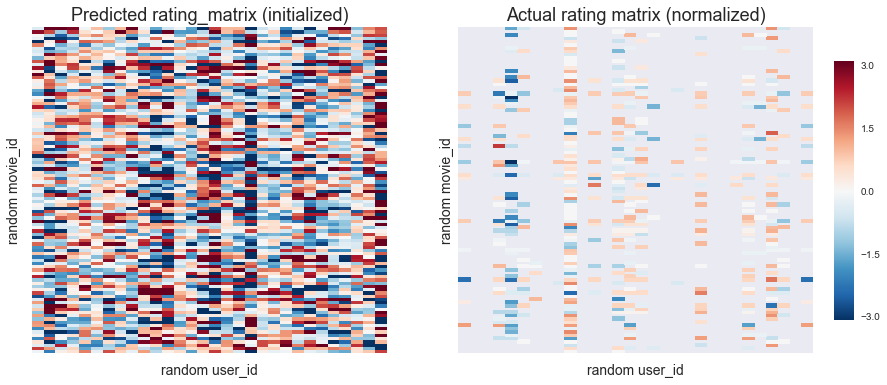

In [15]:
# initial rating before minimize
init_ratings = X_init@theta_init.T

# compare initialized predictions with normalized ratings
fig, ax = plt.subplots(1,2,figsize=(14,6),sharey=True)
cbar_ax = fig.add_axes([0.92, 0.2, .02, 0.6])

for ax, data, title in zip(ax, [init_ratings,model_norm], 
                           ['Predicted rating_matrix (initialized)','Actual rating matrix (normalized)']):
        
    sns.heatmap(data, -3.1, 3.1, cbar=True, cbar_ax=cbar_ax, ax=ax)
    ax.set_title(title, fontsize=18)
    ax.set_xlabel('random user_id', fontsize=14)
    ax.set_ylabel('random movie_id', fontsize=14)
    ax.set_xticklabels([])
    ax.set_yticklabels([])

plt.show()

เห็นได้ว่าค่า Initialized rating_matrix (\\(\textbf{P}\\)) ที่เราสุ่มสร้างขึ้นมานั้น ต่างกับค่า Actual rating_matrix (\\(\textbf{R}\\)) อย่างสิ้นเชิง และเราต้องการให้ระบบของเราลดความแตกต่างนี้ลงให้มากที่สุด เพื่อจะได้ใช้แบบจำลองระบบแนะนำสินค้า \\(\textbf{P} = \textbf{X} \times \boldsymbol{\Theta}^{T}\\) มาคาดการณ์คะแนนภาพยนตร์ที่ผู้ชมยังไม่ได้ให้คะแนน

เพื่อจะลดค่าความแตกต่างของ \\(\textbf{P}\\) และ \\(\textbf{R}\\) นั้น เราต้องหาดัชนีวัดความแตกต่างดังกล่าวที่สามารถคำนวนออกมาเป็นตัวเลขได้ ดัชนีนั้นคือ **cost function** โดยสามารถคำนวนได้ ดังนี้

$$
cost(\textbf{X},\boldsymbol{\Theta}) = \frac{1}{2}\sum\limits_{i,j:r_{ij}\ne{NaN}} (p_{ij}-r_{ij})^{2} + 
\frac{\lambda}{2}\sum\limits_{a=1}^m\sum\limits_{c=1}^k (x_{c}^{(a)})^{2} + 
\frac{\lambda}{2}\sum\limits_{b=1}^n\sum\limits_{c=1}^k (\theta_{c}^{(b)})^{2}
$$

ซึ่งค่าด้านขวามือของสมการสามารถแยกเป็นสามส่วน โดย
* ส่วนแรก ถือเป็น cost function ที่ขึ้นกับคะแนนภาพยนตร์จริง โดยทำการรวมค่าความแตกต่างทั้งหมดของ \\(p_{ij} \in \textbf{P}\\) กับ \\(r_{ij} \in \textbf{R}\\) โดยคิดเฉพาะค่า \\(r_{ij}\\) จริงเท่านั้น (\\(r_{ij} \ne NaN\\) where \\(NaN\\)=Not a Number)
* ส่วนที่สองและสาม เป็นส่วนที่เรียกว่า regularization terms ซึ่งขึ้นกับค่า hyperparameter อีกตัวหนึ่ง ชื่อว่า regularization parameter (\\(\lambda\\)) โดยส่วนนี้เป็นจะช่วยควบคุมเรื่อง bias-variance tradeoff เช่นเดียวกับ \\(k\\) ที่เราพูดถึงไปก่อนแล้ว และเราควรทดลองปรับค่านี้ในการใช้งานจริงเพื่อให้ได้ระบบที่มีประสิทธิภาพที่สุด ในที่นี่ผู้เขียนขอสมมติ regularization parameter เป็น 1 (`reg_param=1`)


In [16]:
# a method for separating 'X' and 'theta'
def X_and_theta_sep(X_and_theta, n_movies, n_users, n_features):
    
    # extract 'X' from the first (n_movies*n_features) elements of 'X_and_theta'
    X = X_and_theta[:n_movies*n_features].reshape(n_movies, n_features)
    # extract 'theta' from the rest
    theta = X_and_theta[n_movies*n_features:].reshape(n_users, n_features)
    
    return X, theta

In [17]:
def cost_cal(X_and_theta, ratings, n_movies, n_users, n_features, reg_param):
    
    # get 'X' and 'theta'
    X, theta = X_and_theta_sep(X_and_theta, n_movies, n_users, n_features)
    
    # calculate the cost function due to accuracy and regularization 
    cost = np.nansum((X@theta.T - ratings)**2)/2
    regCost = (reg_param/2)*(np.sum(theta**2) + np.sum(X**2))
    
    return cost + regCost

เมื่อเราทำการนิยาม cost function แล้ว เราก็ลองทำการคำนวนค่า cost function จาก \\(\textbf{P}\\) และ \\(\textbf{R}\\) ในแผนผังข้างบนออกมา ได้ค่า Initial cost value = 1618.24393218

In [18]:
# set a regularization parameter
reg_param = 1

# initial cost value
print('Initial cost value:', cost_cal(initial_X_and_theta, model_norm, rand_movie_size, rand_user_size, n_features, reg_param))

Initial cost value: 1618.24393218


## Optimzation of predictions (ขั้นตอนเพิ่มความแม่นยำของค่าคาดการณ์)



เมื่อเรารู้การคิด cost function แล้ว คำถามต่อไปคือ เราจะทำอย่างไรที่จะลดค่า cost function นี้ โดยมีจุดมุ่งหมายว่า เมื่อ cost function ลดลง ค่าคาดการณ์คะแนนภาพยนตร์ \\(\textbf{P}\\) นั้น จะมีความใกล้เคียงกับ คะแนนภาพยนตร์จริง \\(\textbf{R}\\) มากขึ้น

จากพื้นฐานของ calculus เราทราบว่าเมื่อค่าของ function หนึ่งอยู่ในค่าต่ำสุด(หรือสูงสุด) นั้น ค่า gradient (หรือ deivative, หรือ slope, หรือค่าอนุพันธ์) ของ function นั้น จะมีค่าเป็น 0 เมื่อเทียบกับตัวแปรของ function นั้นเอง (ในการคำนวนทาง computer โดยมากแล้ว ค่า gradient จะไม่เป็น 0 แต่จะเป็นค่าน้อยมาก)

แต่หากค่า gradient ของ function นั้นเทียบกับตัวแปรหนึ่งตัวแปรใด (partial derivative with respect to a variable) ไม่เป็น 0 เราก็สามารถใช้ค่า gradient ที่คำนวนได้มาปรับค่า variable (ตัวแปร) นั้นๆ เพื่อให้ function เข้าใกล้เคียงค่าต่ำสุด(หรือสูงสุด) มากขึ้น แล้วทำเช่นนี้ซ้ำไปเรื่อยๆ จนค่าของ function ที่เราสนใจอยู่ในค่าต่ำสุด(หรือสูงสุด) -- เป็นการใช้หลักการ [**Gradient Descent**](https://en.wikipedia.org/wiki/Gradient_descent)

เมื่อทราบเช่นนี้แล้ว เราก็สามารถเขียนนิยามการคำนวน gradients ของ cost function ด้านบน โดยการคิดค่า partial derivative เทียบกับตัวแปร \\(x_{k}^{(i)}\\) และ \\(\theta_{k}^{(j)}\\) ทุกตัว ได้ดังนี้

In [19]:
def gradient_cal(X_and_theta, ratings, n_movies, n_users, n_features, reg_param):
    
    # get 'X' and 'theta'
    X, theta = X_and_theta_sep(X_and_theta, n_movies, n_users, n_features)
    
    # predicted rating
    pred = X@theta.T
    # calculate the difference between predicted and actual rating, replace NaN with 0
    diff = np.nan_to_num(pred-ratings)
    
    # set learning rate
    learning_rate = 1
    # calculate gradients
    X_grad = learning_rate*(diff@theta + reg_param*X)
    theta_grad = learning_rate*(diff.T@X + reg_param*theta)
    
    return np.r_[X_grad.flatten(), theta_grad.flatten()]

สังเกตว่าในนิยามข้างบน มีตัวแปรหนึ่งที่ไม่ได้มาจากการคิดค่าอนุพันธ์ตามหลักการทั่วไปของ calculus นั่นก็คือ `learning_rate` โดยตัวแปรนี้เป็น hyperparameter อีกตัวหนึ่งที่เราสามารถปรับเพื่อให้การทำ *Gradient Descent* ของเรามีประสิทธิภาพมากขึ้น ซึ่งก็จะทำให้ระบบแนะนำสินค้าของเราทำงานได้ดีขึ้นด้วย

ในที่นี่ผู้เขียนกำหนดให้ `learning_rate = 1`

เมื่อนิยามทั้งค่า **cost function** และ **gradients** แล้ว เราสามารถเอาข้อมูลส่วนนี้ป้อนเข้า module ที่ใช้คำนวน optimization ได้ โดยในที่นี้ผู้เขียนเลือกใช้ `scipy.optimize.minimize` จาก SciPy

ส่วนหลักสำหรับ `scipy.optimize.minimize` นั้นรับคำนิยามของ function ที่เราต้องการหาค่าต่ำสุด ซึ่งในที่นี้ก็คือ cost function, ค่า gradients, และชุดตัวแปรเริ่มต้น(ในรูป 1-dimensional array) โดยเราใช้ค่าที่เราสุ่มไว้ก่อนหน้านี้

เมื่อการประมวลผลสิ้นสุดแล้วระบบก็จะแสดงผลออกมาว่าค่า cost function ณ เวลานั้นเป็นเท่าไหร่, การประมวลดำเนินการไปกี่รอบ, ...

เปรียบเทียบค่า cost function และ gradients ก่อนและหลัง (initial and optimized) การประมวล `scipy.optimize.minimize`
* ค่า cost function ลดลงจาก 1618 เป็น 56
* ค่า gradients (ตัวอย่าง 5 ตัวแรก) ลดจากเลขหลักหน่วย เป็นหลัก \\(\times10^{-7}\\)

In [20]:
from scipy.optimize import minimize

# set a regularization parameter
reg_param = 1

# minimizing the cost function
min_res = minimize(cost_cal, initial_X_and_theta, args=(model_norm, rand_movie_size, rand_user_size, n_features, reg_param), 
         method=None, jac=gradient_cal, options={'maxiter':3000, 'disp':True})

# initial cost value
print('Initial cost value:', cost_cal(initial_X_and_theta, model_norm, rand_movie_size, rand_user_size, n_features, reg_param))

# final gradient array
print('Optimized cost value', min_res.fun)

# initial gradient array
n_display = 5
print('Examples of initial gradient values (first %d elements): ' % n_display)
print(gradient_cal(initial_X_and_theta, model_norm, rand_movie_size, rand_user_size, n_features, reg_param)[:n_display])

# final gradient array
print('Examples of optimized gradient values (first %d elements): ' % n_display)
print(min_res.jac[:n_display])

Optimization terminated successfully.
         Current function value: 56.179139
         Iterations: 265
         Function evaluations: 271
         Gradient evaluations: 271
Initial cost value: 1618.24393218
Optimized cost value 56.179139143608026
Examples of initial gradient values (first 5 elements): 
[ 1.07023315  5.28250733  1.00998325  5.10467215  0.67670311]
Examples of optimized gradient values (first 5 elements): 
[ -1.91957318e-07  -2.37021423e-07   6.10272874e-07  -4.49975983e-07
  -5.35768287e-07]


## Optimized predictions (ค่าคาดการณ์จากการคำนวน)


เมื่อได้ค่า \\(\textbf{X}\\) และ \\(\boldsymbol{\Theta}\\) ที่ทำให้ค่า cost function ต่ำที่สุดแล้ว เราก็ควรจะได้ \\(\textbf{P}\\) ที่ดูใกล้เคียงกับ \\(\textbf{R}\\) โดย \\(\textbf{P}\\) นั้นจะมีค่าคาดการณ์คะแนนภาพยนตร์ที่ไม่ได้มีการให้ไว้จริงใน \\(\textbf{R}\\) ด้วย

เราวาดแผนผังของ Optimized rating_matrix (\\(\textbf{P}\\)) และ Actual rating_matrix (\\(\textbf{R}\\)) คู่กันดังนี้

In [21]:
# get predicted 'X' and 'theta'
X, theta = X_and_theta_sep(min_res.x, rand_movie_size, rand_user_size, n_features)

# make rating predictions    
predicted_ratings = X@theta.T

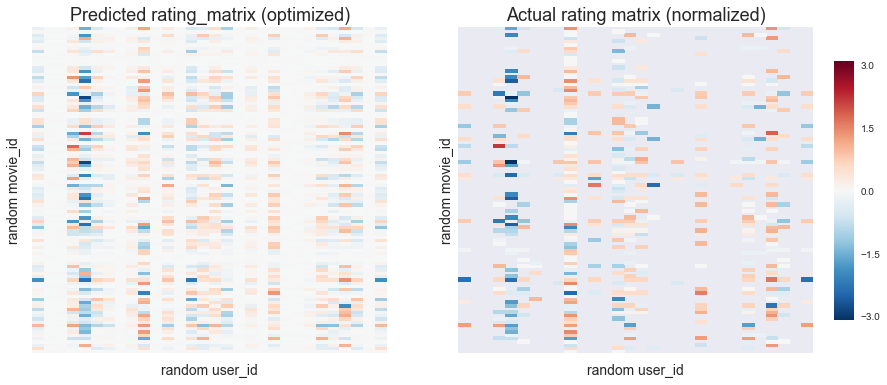

In [22]:
# compare optimized predictions with normalized ratings
fig, ax = plt.subplots(1,2,figsize=(14,6),sharey=True)
cbar_ax = fig.add_axes([0.92, 0.2, .02, 0.6])

for ax, data, title in zip(ax, [predicted_ratings,model_norm], 
                           ['Predicted rating_matrix (optimized)','Actual rating matrix (normalized)']):
        
    sns.heatmap(data, -3.1, 3.1, cbar=True, cbar_ax=cbar_ax, ax=ax)
    ax.set_title(title, fontsize=18)
    ax.set_xlabel('random user_id', fontsize=14)
    ax.set_ylabel('random movie_id', fontsize=14)
    ax.set_xticklabels([])
    ax.set_yticklabels([])

plt.show()

เห็นได้ว่าแผนผัง heatmap คู่นี้ มีความใกล้เคียงกันกว่าคู่ที่แสดงก่อนหน้า (ระหว่าง Initialized-\\(\textbf{P}\\) กับ \\(\textbf{R}\\)) เป็นการแสดงว่าการ optimize ค่า cost function ของเรานั้นประสบความสำเร็จด้วยดี

นอกจากนั้น Optimized-\\(\textbf{P}\\) ก็แสดงการคาดการณ์คะแนนภาพยนตร์ (\\(p_{ij}\\)) ด้วย เช่น จะเห็นว่า ในส่วนตรงกลางของที่วาดวงกลมสีแดงไว้ในแผนผังทางขวามือนั้นไม่มีข้อมูลให้คะแนนจริง (\\(r_{ij}=NaN\\)) แต่ในแผนผังทางซ้ายมือนั้นแสดงค่าเป็นสีโทนส้ม หมายความว่าระบบที่เราเขียนขึ้นคาดการณ์ว่าผู้ชมท่านดังกล่าวจะให้คะแนนภาพยนตร์เรื่องนั้นสูงกว่าค่าเฉลี่ยที่ภาพยนตร์เรื่องนั้นได้รับจากผู้ให้คะแนนจริงท่านอื่นๆ เราจึงควรแนะนำภาพยนตร์เรื่องนี้ให้ท่านนั้น

(ขอทวนว่า \\(\textbf{R}\\) ที่เราแสดงนั้นเป็น mean normalized-\\(\textbf{R}\\) ที่ปรับค่าเฉลี่ยคะแนนจริงที่ภาพยนตร์เรื่องนั้นได้รับจากผู้ให้คะแนนจริงเป็น 0)

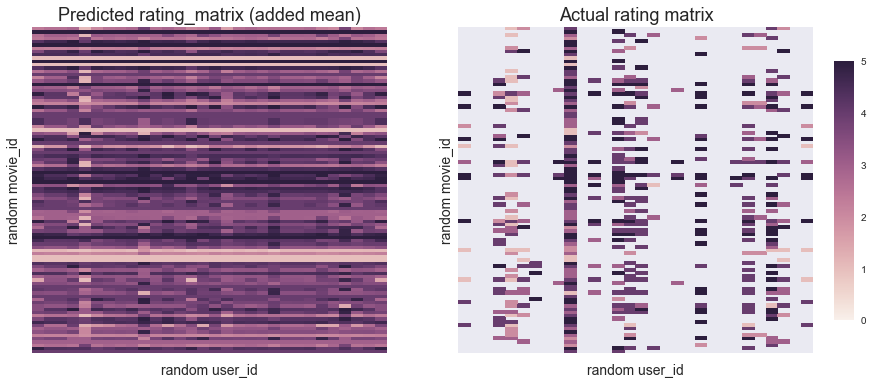

In [23]:
# compare optimized predictions(add back mean ratings) with actual ratings

predicted_ratings_withMean = predicted_ratings + model_mean.reshape(rand_movie_size,1)

fig, ax = plt.subplots(1,2,figsize=(14,6),sharey=True)
cbar_ax = fig.add_axes([0.92, 0.2, .02, 0.6])

for ax, data, title in zip(ax, [predicted_ratings_withMean,model_ratings], 
                           ['Predicted rating_matrix (added mean)','Actual rating matrix']):
        
    sns.heatmap(data, 0, 5, cbar=True, cbar_ax=cbar_ax, ax=ax)
    ax.set_title(title, fontsize=18)
    ax.set_xlabel('random user_id', fontsize=14)
    ax.set_ylabel('random movie_id', fontsize=14)
    ax.set_xticklabels([])
    ax.set_yticklabels([])

plt.show()

In [24]:
# calculate and record the cost function after each iteration 
def cost_cal_tracked(X_and_theta, ratings, n_movies, n_users, n_features, reg_param):
    
    # get 'X' and 'theta'
    X, theta = X_and_theta_sep(X_and_theta, n_movies, n_users, n_features)
    
    # calculate the cost function due to accuracy and regularization 
    cost = np.nansum((X.dot( theta.T ) - ratings)**2)/2
    regCost = (reg_param/2)*(np.sum(theta**2) + np.sum(X**2))
    
    # record the total cost function
    cost_tracked.append(cost + regCost)
    
    return cost + regCost

In [25]:
# initialize a variable to track the cost
cost_tracked = []

# set a regularization parameter
reg_param = 1

# minimizing the cost function
min_res = minimize(cost_cal_tracked, initial_X_and_theta, args=(model_norm, rand_movie_size, rand_user_size, n_features, reg_param), 
         method=None, jac=gradient_cal, options={'maxiter':3000, 'disp':True})

Optimization terminated successfully.
         Current function value: 56.179139
         Iterations: 265
         Function evaluations: 271
         Gradient evaluations: 271


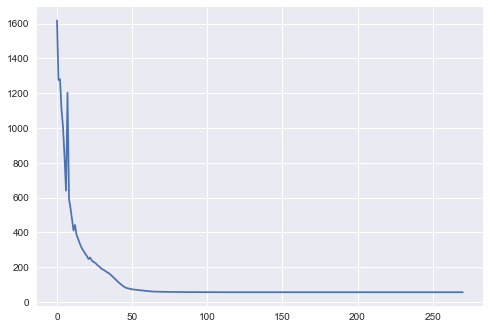

In [26]:
plt.plot(cost_tracked)
plt.show()

## ส่วนเพิ่มเติม
มาถึงตรงนี้ เราก็ได้เห็นการสร้างระบบคาดการณ์คะแนนภาพยนตร์ ซึ่งเป็นตัวอย่างของ recommender systems แบบ collaborative filtering ด้วย Python แล้ว ผู้เขียนขอสรุปเพิ่มเติมเกี่ยวกับจุดย่อยต่างๆ ทั้งที่ได้รับหรือยังไม่ได้รับการพูดถึงในส่วนก่อนหน้า ที่ควรนำมาประกอบการพิจารณาในการสร้าง a recommender system ที่มีประสิทธิภาพ

* ค่าเฉลี่ยของ predicted rating matrix (\\(\textbf{P}\\)) ที่อาจจะต้องปรับคืน เพื่อจะได้เทียบค่า predicted ratings ตามสเกลจริง <br>
  ส่วนนี้จริงๆ ไม่ต้องทำก็ได้ เพียงว่าต้องสื่อสารกับผู้ที่ทำงานร่วมกันเพื่อความเข้าใจที่ตรงกันก่อนนำข้อมูลไปใช้ต่อ
* ค่า randomly initialized \\(\textbf{X}\\), \\(\boldsymbol{\Theta}\\) <br>
  ควรปรับให้เหมาะสมเพื่อช่วยให้การ optimize cost function ทำได้เร็วขึ้น หากค่าสุ่มทั้งสองให้ค่า \\(p_{ij} \in \textbf{P}\\) ที่ไกลจากการกระจายของค่า \\(r_{ij} \in \textbf{R}\\) จริง <br>
  โดย module [`numpy.random.randn`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.randn.html) ที่ผู้เขียนเรียกใช้นั้นสุ่มค่าโดยมี mean (ค่าเฉลี่ย) เป็น 0 และค่า variance (ความแปรปรวน) เป็น 1 ซึ่งเมื่อประกอบรวมกับ `n_features=5` แล้วให้ค่าสุ่ม \\(p_{ij}\\) ไม่ห่างจากค่าของ \\(r_{ij}\\) ใน \\(\textbf{R}\\) จึงถือว่ารับได้
* ค่า hyperparameters: `n_features` (\\(k\\)), `regularization parameter` (\\(\lambda\\)), และ `learning_rate` <br>
  ซึ่งสามารถถูกปรับเพื่อให้ได้ bias-variance tradeoff และ computational power ที่ต้องการ
* More data!, หากต้องการสร้าง a recommender system จริงๆ ก็ควรจะใช้ข้อมูลทั้งหมดที่มี ยิ่งมีข้อมูลมากก็มีความเป็นได้ว่าระบบจะมีความแม่นยำมากยิ่งขึ้น (แน่นอนว่าต้องมี model ที่ดีด้วย)

## บทส่งท้าย
ขออนุญาตกล่าวซ้ำอีกครั้งว่า การแนะนำสินค้านั้นมีจุดมุ่งหมายเพื่อให้เกิดประโยชน์สูงสุดกับทั้งฝ่ายผู้เสนอและผู้ต้องการซื้อสินค้า โดยก้าวหน้าทางความรู้และปริมาณของข้อมูลที่สามารถเข้าถึงได้ในปัจจุบันทำให้มีการสร้างระบบการแนะนำสินค้าที่แม่นยำและเฉพาะบุคคลมากยิ่งขึ้น ซึ่งความรู้ในเรื่องนี้สามารถนำไปปรับใช้ได้กับทุกภาคส่วนของตลาดสินค้าและบริการเพื่อช่วยพัฒนาความสัมพันธ์ในการให้บริการขององค์กรและลูกค้าให้ดียิ่งขึ้น

ผู้เขียนหวังว่าบทความนี้จะช่วยเสริมสร้างความเข้าใจในหลักการทำงานของระบบแนะนำสินค้า (recommender systems) รวมถึงเข้าใจหลักการการสร้างระบบแบบง่ายๆ โดยใช้ฐานข้อมูลมาทำการคาดการณ์การแนะนำ หากเนื้อหาส่วนไหนควรแก้ไขหรือมีคำแนะนำ เชิญส่งข้อความมาได้ครับ ทั้งทาง [Facebook](https://facebook.com/chatdanai.lumdee), [LinkedIn](https://linkedin.com/in/chatdanai-lumdee) หรือ <chatdanai.l@gmail.com>